In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [14]:
# 데이터 분할
x = np.arange(20)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [16]:
train, test = train_test_split(x)
print(f"train data : {train}, test data : {test}")

train data : [ 7 18  3 14 16  4 10  1 15  6 13 12  8 19  0], test data : [ 5  9 17  2 11]


In [20]:
# 교차검증
fold = KFold(n_splits=4)
for train, test in fold.split(x):
    print(f"train data : {train}, test data : {test}")

train data : [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19], test data : [0 1 2 3 4]
train data : [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19], test data : [5 6 7 8 9]
train data : [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19], test data : [10 11 12 13 14]
train data : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14], test data : [15 16 17 18 19]


##### 표준화

In [57]:
# 적용전
data = pd.DataFrame(data=np.random.randn(5,5), columns=["A","B","C","D","E"])
data.describe().round(3)

,A,B,C,D,E
count,5.000,5.000,5.000,5.000,5.000
mean,0.173,-1.056,-0.337,0.702,0.004
std,0.909,1.013,0.911,0.704,1.003
min,-1.117,-2.170,-1.743,-0.239,-0.934
25%,-0.195,-2.085,-0.513,0.355,-0.582
50%,0.139,-0.771,-0.132,0.643,-0.559
75%,0.826,-0.147,-0.054,1.184,0.657
max,1.213,-0.110,0.755,1.564,1.437


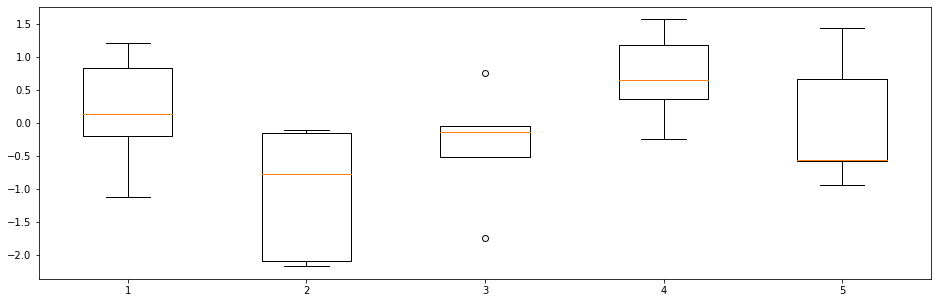

In [58]:
plt.figure(figsize=(16, 5))
plt.boxplot(data)
plt.show()

In [60]:
data_melt = pd.melt(frame=data, value_vars=["A","B","C","D","E"], var_name='column', value_name='value')
data_melt.head()

,column,value
0,A,-1.116812
1,A,0.826075
2,A,-0.194562
3,A,1.212628
4,A,0.138502


In [61]:
fig = px.box(data_frame=data_melt, x="column", y="value")
fig

In [62]:
# 적용후
scaler = StandardScaler()
data_standard = scaler.fit_transform(data)
data_standard = pd.DataFrame(data_standard, columns=["A","B","C","D","E"])
data_standard.describe().round(3)


,A,B,C,D,E
count,5.000,5.000,5.000,5.000,5.000
mean,-0.000,0.000,0.000,0.000,0.000
std,1.118,1.118,1.118,1.118,1.118
min,-1.586,-1.229,-1.724,-1.492,-1.045
25%,-0.452,-1.135,-0.215,-0.550,-0.654
50%,-0.043,0.315,0.252,-0.093,-0.628
75%,0.803,1.004,0.347,0.766,0.728
max,1.278,1.045,1.341,1.369,1.598


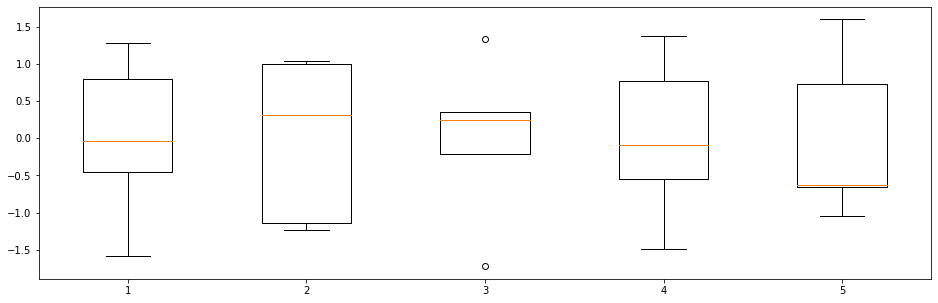

In [63]:
plt.figure(figsize=(16,5))
plt.boxplot(data_standard)
plt.show()

In [66]:
data_standard_melt = pd.melt(frame=data_standard, value_vars=["A","B","C","D","E"],
                             var_name="column", value_name="value")
data_standard_melt.head()

,column,value
0,A,-1.586114
1,A,0.802795
2,A,-0.452146
3,A,1.278088
4,A,-0.042622


In [69]:
fig = px.box(data_frame=data_standard_melt, x="column", y="value")
fig

##### 정규화

In [71]:
# 적용전
data = pd.DataFrame(data = np.random.randn(5,5), columns=["A","B","C","D","E"])
data.describe().round(3)

,A,B,C,D,E
count,5.000,5.000,5.000,5.000,5.000
mean,-0.033,0.036,0.203,-0.531,-0.239
std,0.893,0.530,0.293,0.593,0.690
min,-0.832,-0.474,-0.221,-1.273,-0.930
25%,-0.655,-0.464,0.016,-1.019,-0.710
50%,-0.494,0.079,0.359,-0.353,-0.483
75%,0.610,0.251,0.407,-0.132,0.185
max,1.208,0.789,0.452,0.123,0.745


In [72]:
data.median()

A   -0.494003
B    0.078813
C    0.358646
D   -0.353159
E   -0.483474
dtype: float64

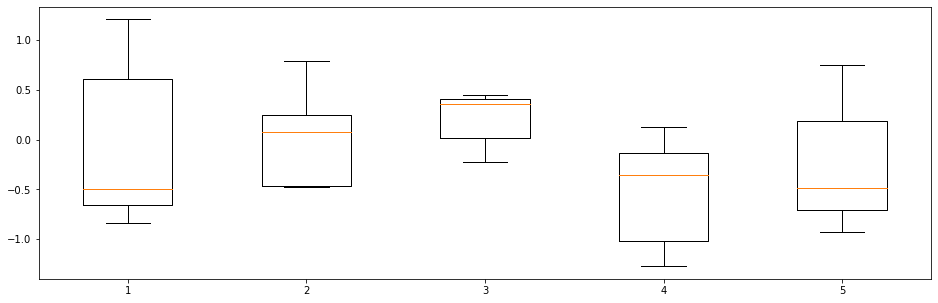

In [73]:
plt.figure(figsize=(16,5))
plt.boxplot(x=data.values)
plt.show()

In [74]:
data_melt = pd.melt(frame=data, value_vars=["A","B","C","D","E"], var_name="column", value_name="value")
data_melt.head()

,column,value
0,A,1.207580
1,A,-0.655120
2,A,-0.832458
3,A,-0.494003
4,A,0.609647


In [75]:
fig = px.box(data_frame=data_melt, x="column", y="value")
fig